# Titanic

In [32]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

In [17]:
# Train and test datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Looking at the Data

In [42]:
# Checking row and column count
df_train.shape

(891, 12)

In [44]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [45]:
# How many people survived
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [46]:
# Statistics on numerical columns in dataset
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Looking at Graphs of the Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112a527b8>]], dtype=object)

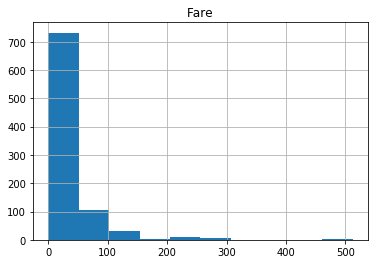

In [47]:
# Visual of Fare column
df_train.hist(column='Fare')

Text(0.5,1,'Survived')

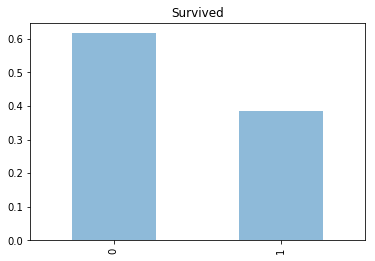

In [64]:
# H
plt.subplot2grid((2,3), (0,3))
df_train.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Survived")

Text(0.5,1,'Survived by Age')

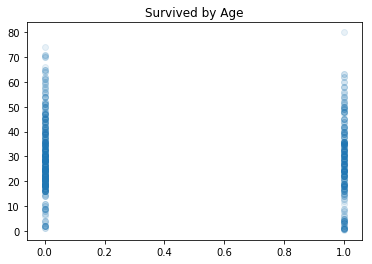

In [62]:
# How many people survived with respect to age
plt.subplot2grid((2,3), (0,3))
plt.scatter(df_train.Survived, df_train.Age, alpha=0.1)
plt.title("Survived by Age")

# Cleaning the Data

In [68]:
df_train["Fare"] = df_train["Fare"].fillna(df_train["Fare"].dropna().median())
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].dropna().median())

df_train.loc[df_train["Sex"] == "male", "Sex"] = 0
df_train.loc[df_train["Sex"] == "female", "Sex"] = 0

df_train["Embarkd"] = df_train["Embarked"].fillna("S")
df_train.loc[df_train["Embarked"] == "S", "Embarked"] = 0
df_train.loc[df_train["Embarked"] == "C", "Embarked"] = 1
df_train.loc[df_train["Embarked"] == "Q", "Embarked"] = 2